In [1]:
using DataFrames
using JSON
using LaTeXStrings
using Pandas
using PyCall
using PyPlot
using LsqFit
PLT = pyimport("matplotlib.pyplot")
PyPlot.plt.style.use("../notebooks/paper.mplstyle")

In [13]:
# loading the dataframe

N = 100

df1 = read_pickle("../data/Max_2_SAT_N_"*string(N)*"_λstd_0_T_1024.0_reps_50_with_solution_and_SDP_87.pkl")
# df1 = read_pickle("../reduced_data/Max_2_SAT_N_"*string(N)*"_λstd_0_T_1024.0_reps_50_with_solution_and_SDP.pkl")
df = DataFrames.DataFrame(df1);

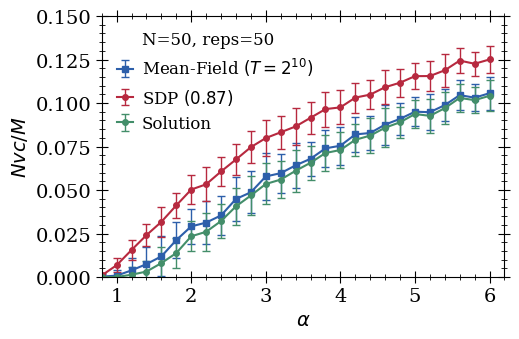

In [5]:
# Plotting ratio of number of violated clauses over total number of clauses as a function of alpha 



eline = 1
cap   = 3

mcolor   = "#2D5FAA"
sdpcolor = "#B7293F"
solcolor = "#438E6A";

figure(figsize=(5, 3.2))
PyPlot.plot([], []," ", label="N="*string(N)*", reps=50 ",color="black")#

alphas          = unique(df.alpha)
L               = length(alphas)
Nvc_mf          = zeros(L)
Nvc_sdp_avg     = zeros(L)
Nvc_sol         = zeros(L)
Nvc_mf_std      = zeros(L)
Nvc_sdp_avg_std = zeros(L)
Nvc_sol_std     = zeros(L)

for i in 1:L
    alpha = alphas[i]

    Nvc_mf[i]      = mean( ( df[( df.alpha .== alpha ), :Mean_field_nvc ] ) ./ ( N * alpha ) )
    # Nvc_sdp_avg[i] = mean( ( df[( df.alpha .== alpha ), :SDP_nvc ] ) ./ ( N * alpha ) )
    Nvc_sdp_avg[i] = mean( [ mean( hyperplanes ) for hyperplanes in df[ ( df.alpha  .== alpha ), :SDP_87_nvc ] ] ./ ( N * alpha ) )
    Nvc_sol[i]     = mean( ( df[ (df.alpha  .== alpha), :Solution_nvc] ) ./ ( N * alpha ) )

    Nvc_mf_std[i]      = std( ( df[ ( df.alpha  .== alpha ), :Mean_field_nvc] ) ./ ( N * alpha ) )
    # Nvc_sdp_avg_std[i] = std( ( df[( df.alpha .== alpha ), :SDP_nvc ] ) ./ ( N * alpha ) )
    Nvc_sdp_avg_std[i] = std( [ mean( hyperplanes ) for hyperplanes in df[ ( df.alpha  .== alpha ) , :SDP_87_nvc ] ] ./ ( N * alpha ) )
    Nvc_sol_std[i]     = std( ( df[ (df.alpha  .== alpha ), :Solution_nvc ] ) ./ ( N * alpha ) )
end

PyPlot.errorbar(alphas, Nvc_mf, yerr = Nvc_mf_std, elinewidth = eline, marker = "s", capsize= cap, markersize=4, color=mcolor, label = "Mean-Field "*L"(T=2^{10})")
PyPlot.errorbar(alphas, Nvc_sdp_avg, yerr = Nvc_sdp_avg_std, elinewidth = eline, marker = "o", capsize= cap, markersize=4, color=sdpcolor, label = "SDP "*L" (0.87)")
PyPlot.errorbar(alphas, Nvc_sol, yerr = Nvc_sol_std, elinewidth = eline, marker = "o", capsize= cap, markersize=4, color=solcolor, label = "Solution")

ylim(0,.15)
xlim(0.8,6.2)

ylabel(L"N{vc}/M")
xlabel(L"α")

minorticks_on()

legend(ncol=1, fontsize=12, handlelength=1.0, borderaxespad=0.5, handletextpad=0.5, columnspacing=0.8, loc="upper left")
tight_layout(pad=0)

show()
gcf()

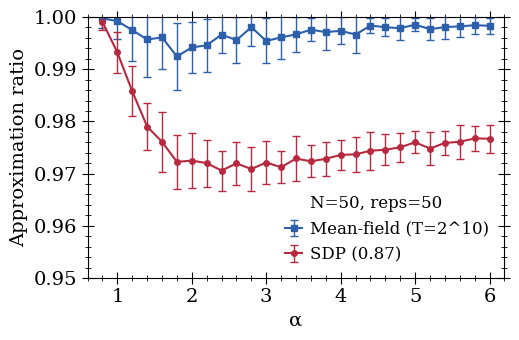

In [8]:
# Plotting ratio of number of violated clauses over total number of clauses as a function of alpha 


eline = 1
cap   = 3

mcolor   = "#2D5FAA"
sdpcolor = "#B7293F";

figure( figsize = (5, 3.2) )
PyPlot.plot( [], []," ", label="N="*string(N)*", reps=50 ", color="black")

alphas         = unique(df.alpha)
L              = length(alphas)
ar_mf          = zeros(L)
ar_sdp_avg     = zeros(L)
ar_mf_std      = zeros(L)
ar_sdp_avg_std = zeros(L)

for i in 1:L
    alpha = alphas[i]

    ar_mf[i]      = mean( (N*alpha .- df[(df.alpha  .== alpha),:Mean_field_nvc])./(N*alpha .- df[(df.alpha  .== alpha),:Solution_nvc]))
    # ar_sdp_avg[i] = mean((N*alpha .- ( df[( df.alpha .== alpha ), :SDP_87_nvc ] ))./((N*alpha) .-df[(df.alpha  .== alpha),:Solution_nvc]))
    ar_sdp_avg[i] = mean((N*alpha .- [mean(hyperplanes) for hyperplanes in df[(df.alpha  .== alpha),:SDP_87_nvc]])./((N*alpha) .-df[(df.alpha  .== alpha),:Solution_nvc]))

    ar_mf_std[i]      = std( (N*alpha .- df[(df.alpha  .== alpha),:Mean_field_nvc])./(N*alpha .- df[(df.alpha  .== alpha),:Solution_nvc]))
    # ar_sdp_avg_std[i] = std((N*alpha .- ( df[( df.alpha .== alpha ), :SDP_87_nvc ] ))./((N*alpha) .-df[(df.alpha  .== alpha),:Solution_nvc]))
    ar_sdp_avg_std[i] = std((N*alpha .- [mean(hyperplanes) for hyperplanes in df[(df.alpha  .== alpha),:SDP_87_nvc]])./((N*alpha) .-df[(df.alpha  .== alpha),:Solution_nvc]))
end

PyPlot.errorbar(alphas, ar_mf, yerr = ar_mf_std, elinewidth = eline, marker = "s", capsize = cap, markersize=4, color=mcolor, label = "Mean-field (T=2^10)")
PyPlot.errorbar(alphas, ar_sdp_avg, yerr = ar_sdp_avg_std, elinewidth = eline, marker = "o", capsize = cap, markersize=4, color=sdpcolor, label = "SDP (0.87)")

ylim(0.95,1)
xlim(0.6,6.2)

ylabel("Approximation ratio")
xlabel("α")


minorticks_on()
legend(ncol=1, fontsize=12, handlelength=1.0, borderaxespad=0.5, handletextpad=0.5, columnspacing=0.8, loc="lower right")
tight_layout(pad=0)

show()
gcf()